In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unrar x "/content/drive/MyDrive/Rice_Image_Dataset.rar"

Streaming output truncated to the last 5000 lines.
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (550).jpg              94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg             94%  OK 
Extracting  Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg             94%  OK 
Extracting  Rice_Image_Datase

In [3]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from tqdm import tqdm

In [4]:
path=pathlib.Path("/content/Rice_Image_Dataset")

In [5]:
os.listdir(path)

['Jasmine',
 'Arborio',
 'Karacadag',
 'Basmati',
 'Rice_Citation_Request.txt',
 'Ipsala']

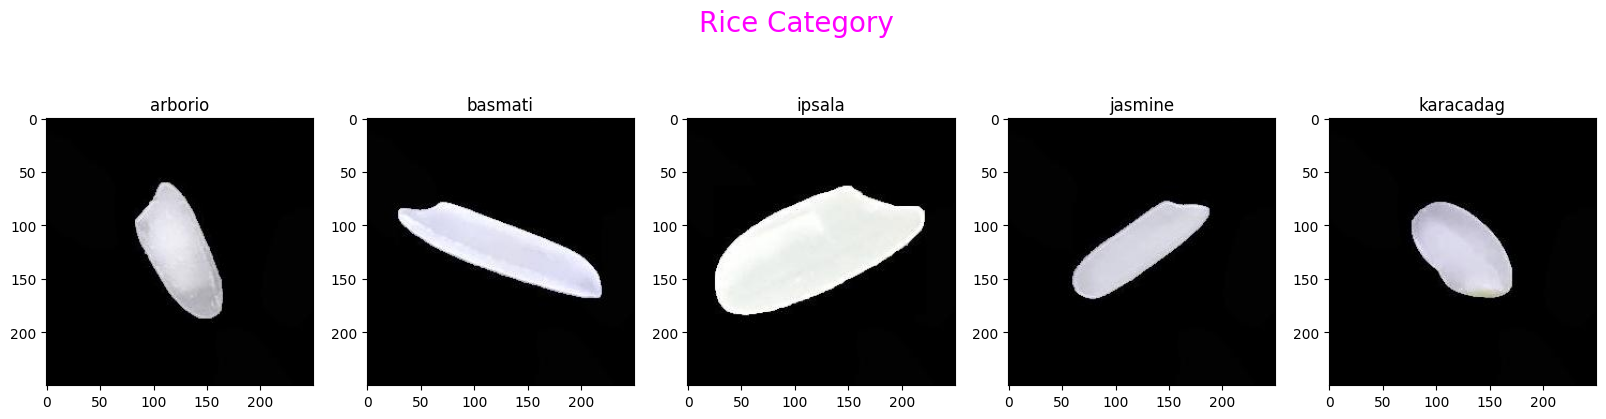

In [6]:
rice_categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

data = {category.lower(): list(path.glob(f'{category}/*')) for category in rice_categories}

rice_labels = {i: label for i, label in enumerate(rice_categories)}

fig, ax = plt.subplots(ncols=len(rice_categories), figsize=(20, 5))
fig.suptitle('Rice Category', color='magenta', fontsize=20)

for index, (category, images) in enumerate(data.items()):
    ax[index].set_title(category)
    ax[index].imshow(img.imread(images[0]))


In [7]:
def get_unique_image_formats(root_folder):
    image_formats = []

    for root, _, files in os.walk(root_folder):
        for file in files:
            _, extension = os.path.splitext(file)
            if extension.lower() in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']:
                image_formats.append(extension.lower())

    unique_formats = np.unique(image_formats)
    return unique_formats

In [35]:
## For Loading Images
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow.keras as keras
# For Image Augmentation
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomBrightness, RandomZoom, RandomContrast, RandomCrop
from tensorflow.keras.layers import RandomTranslation, Resizing,Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
batch_size = 128
img_height = 175
img_width = 175
data_dir =path
SEED  =78
input_shape = (img_height, img_width)
input_shap_2=(img_height, img_width,3)

In [10]:
get_unique_image_formats(path)


array(['.jpg'], dtype='<U4')

In [11]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [12]:
train_data=train_gen.flow_from_directory(path,
                                         target_size=input_shape,
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')

Found 60000 images belonging to 5 classes.


In [13]:
test_data=train_gen.flow_from_directory(path,
                                        target_size=input_shape,
                                        batch_size=batch_size,
                                        shuffle=False,
                                        subset='validation')

Found 15000 images belonging to 5 classes.


In [15]:
from tensorflow.keras import layers, models
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shap_2, padding='same', strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='valid', strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming you have 5 classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [17]:
early_stop = EarlyStopping(monitor="val_loss",patience = 5, verbose = 1, restore_best_weights = True)

In [18]:
save=model.fit(train_data, validation_data=test_data, epochs=15,callbacks=[early_stop])



Epoch 1/15
469/469 [==============================] - 125s 238ms/step - loss: 0.1392 - accuracy: 0.9515 - val_loss: 0.0536 - val_accuracy: 0.9817
Epoch 2/15
469/469 [==============================] - 112s 238ms/step - loss: 0.0533 - accuracy: 0.9821 - val_loss: 0.0229 - val_accuracy: 0.9928
Epoch 3/15
469/469 [==============================] - 112s 239ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 4/15
469/469 [==============================] - 131s 280ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 5/15
469/469 [==============================] - 113s 242ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0139 - val_accuracy: 0.9963
Epoch 6/15
469/469 [==============================] - 113s 240ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 7/15
469/469 [==============================] - 111s 236ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0109 -

In [19]:
model.save('/content/drive/MyDrive/Model/Rice.h5')

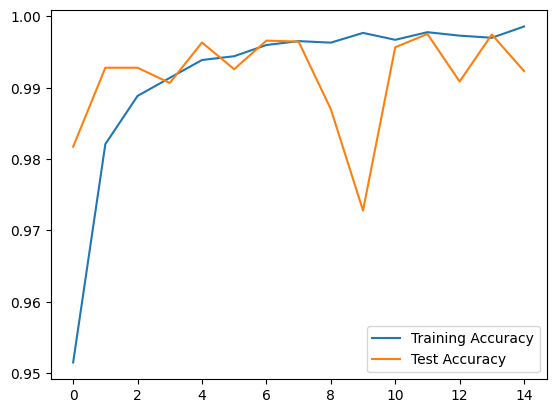

In [20]:
plt.plot(save.history['accuracy'], label="Training Accuracy")
plt.plot(save.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

In [21]:
score = model.evaluate(test_data, verbose=1)

118/118 [==============================] - 22s 182ms/step - loss: 0.0236 - accuracy: 0.9923


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_data)

118/118 [==============================] - 22s 188ms/step


In [23]:
Y_pred_classes = np.argmax(Y_pred, axis=1)
pd.DataFrame(classification_report(test_data.classes, Y_pred_classes, target_names=train_data.class_indices, output_dict=True)).transpose()

,precision,recall,f1-score,support
Arborio,0.998978,0.977333,0.988037,3000.000000
Basmati,0.991048,0.996333,0.993684,3000.000000
Ipsala,1.000000,0.998333,0.999166,3000.000000
Jasmine,0.990991,0.990000,0.990495,3000.000000
Karacadag,0.981027,0.999667,0.990259,3000.000000
accuracy,0.992333,0.992333,0.992333,0.992333
macro avg,0.992409,0.992333,0.992328,15000.000000
weighted avg,0.992409,0.992333,0.992328,15000.000000


In [54]:
rice = image.load_img("/content/Rice_Image_Dataset/Jasmine/Jasmine (10001).jpg", target_size=(175,175))

In [55]:
rice = np.array(rice)/255


In [56]:
rice.shape

(175, 175, 3)

In [57]:
rice = np.expand_dims(rice, axis=0)

In [58]:
result = model.predict(rice)

1/1 [==============================] - 0s 18ms/step


In [62]:
# Assuming 'result' contains the prediction for a single image
class_indices = {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

# Get the index of the maximum probability prediction
predicted_class_index = np.argmax(result)

# Inverse mapping to get the predicted class label
predicted_class_label = [class_label for class_label, index in class_indices.items() if index == predicted_class_index][0]

# Get the corresponding probability
predicted_probability = result[0][predicted_class_index]

print(f"Predicted Label: {predicted_class_label} (Probability: {predicted_probability:.2f})")

Predicted Label: Jasmine (Probability: 1.00)


### VGG16

In [63]:
from keras.applications.vgg16 import VGG16

In [64]:
vgg16=VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [65]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [66]:
vgg16.input_shape

(None, 224, 224, 3)

In [67]:
# Load VGG16 with pre-trained weights on ImageNet
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shap_2)
base_model.trainable = False

# Add custom classification layers on top of VGG16
model_vgg16 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming you have 5 classes
])

58889256/58889256 [==============================] - 0s 0us/step


In [68]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [69]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 15,767,365
Trainable params: 1,052,677
Non-trainable params: 14,714,688
__________________________________

In [70]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Model/model_vgg16.hdf5',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [71]:
save2 = model_vgg16.fit(train_data, epochs = 20, validation_data = test_data, callbacks=callbacks)

Epoch 1/20
469/469 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9570
Epoch 1: val_accuracy improved from -inf to 0.98513, saving model to /content/drive/MyDrive/Model/model_vgg16.hdf5
469/469 [==============================] - 227s 458ms/step - loss: 0.1245 - accuracy: 0.9570 - val_loss: 0.0452 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9865
Epoch 2: val_accuracy improved from 0.98513 to 0.99327, saving model to /content/drive/MyDrive/Model/model_vgg16.hdf5
469/469 [==============================] - 210s 448ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.0222 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9895
Epoch 3: val_accuracy did not improve from 0.99327
469/469 [==============================] - 201s 429ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0277 - val_accuracy: 0.99

In [72]:
model_vgg16.load_weights('/content/drive/MyDrive/Model/model_vgg16.hdf5')

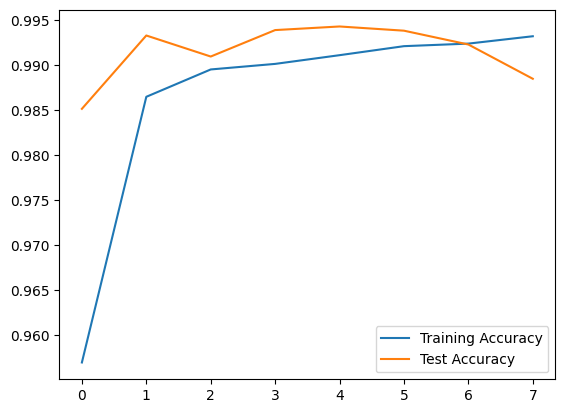

In [73]:
plt.plot(save2.history['accuracy'], label="Training Accuracy")
plt.plot(save2.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

In [74]:
score2= model_vgg16.evaluate(test_data, verbose=1)

118/118 [==============================] - 41s 349ms/step - loss: 0.0190 - accuracy: 0.9943


In [78]:
result_2 = model_vgg16.predict(rice)

1/1 [==============================] - 0s 20ms/step


In [79]:
# Assuming 'result' contains the prediction for a single image
class_indices = {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

# Get the index of the maximum probability prediction
predicted_class_index = np.argmax(result_2)

# Inverse mapping to get the predicted class label
predicted_class_label = [class_label for class_label, index in class_indices.items() if index == predicted_class_index][0]

# Get the corresponding probability
predicted_probability = result_2[0][predicted_class_index]

print(f"Predicted Label: {predicted_class_label} (Probability: {predicted_probability:.2f})")

Predicted Label: Jasmine (Probability: 1.00)


In [75]:

print(f'Model 1 Vanilla Loss: {score[0]}, Accuracy: {score[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')

Model 1 Vanilla Loss: 0.023623524233698845, Accuracy: 99.23333525657654
Model 2 VGG16 Loss: 0.01898251101374626, Accuracy: 99.42666888237


### Fine Tunning

In [80]:
vgg16.trainable = True
model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
save3 = model_vgg16.fit(train_data, epochs = 10, validation_data = test_data, callbacks=callbacks)

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9952
Epoch 1: val_accuracy improved from 0.99427 to 0.99527, saving model to /content/drive/MyDrive/Model/model_vgg16.hdf5
469/469 [==============================] - 205s 433ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0153 - val_accuracy: 0.9953 - lr: 1.0000e-05
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9956
Epoch 2: val_accuracy did not improve from 0.99527
469/469 [==============================] - 200s 427ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0145 - val_accuracy: 0.9953 - lr: 1.0000e-05
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9958
Epoch 3: val_accuracy improved from 0.99527 to 0.99533, saving model to /content/drive/MyDrive/Model/model_vgg16.hdf5
469/469 [==============================] - 202s 431ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0152 - val_acc

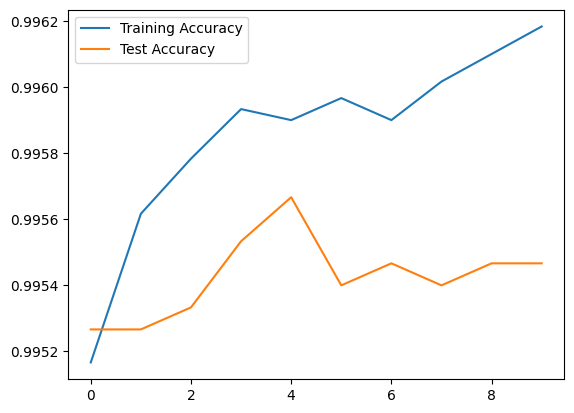

In [82]:
plt.plot(save3.history['accuracy'], label="Training Accuracy")
plt.plot(save3.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

In [83]:
model_vgg16.load_weights('/content/drive/MyDrive/Model/model_vgg16.hdf5')

In [84]:
score3 = model_vgg16.evaluate(test_data, verbose=1)
print(f'Model 1 Vanilla Loss: {score[0]}, Accuracy: {score[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')
print(f'Model 2 VGG16 Fine-tuned Loss: {score3[0]}, Accuracy: {score3[1]*100}')

118/118 [==============================] - 41s 347ms/step - loss: 0.0141 - accuracy: 0.9957
Model 1 Vanilla Loss: 0.023623524233698845, Accuracy: 99.23333525657654
Model 2 VGG16 Loss: 0.01898251101374626, Accuracy: 99.42666888237
Model 2 VGG16 Fine-tuned Loss: 0.014067115262150764, Accuracy: 99.56666827201843


In [85]:
y_pred = model_vgg16.predict(test_data)

118/118 [==============================] - 44s 370ms/step


In [86]:
y_pred = np.argmax(y_pred, axis=1)

In [88]:
result_3 = model_vgg16.predict(rice)

1/1 [==============================] - 0s 213ms/step


In [89]:
# Assuming 'result' contains the prediction for a single image
class_indices = {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

# Get the index of the maximum probability prediction
predicted_class_index = np.argmax(result_3)

# Inverse mapping to get the predicted class label
predicted_class_label = [class_label for class_label, index in class_indices.items() if index == predicted_class_index][0]

# Get the corresponding probability
predicted_probability = result_3[0][predicted_class_index]

print(f"Predicted Label: {predicted_class_label} (Probability: {predicted_probability:.2f})")

Predicted Label: Jasmine (Probability: 1.00)


In [90]:
pd.DataFrame(classification_report(test_data.classes, y_pred, target_names=train_data.class_indices, output_dict=True)).transpose()

,precision,recall,f1-score,support
Arborio,0.994004,0.994667,0.994335,3000.000000
Basmati,0.995346,0.998000,0.996671,3000.000000
Ipsala,0.998001,0.998667,0.998334,3000.000000
Jasmine,0.995648,0.991333,0.993486,3000.000000
Karacadag,0.995335,0.995667,0.995501,3000.000000
accuracy,0.995667,0.995667,0.995667,0.995667
macro avg,0.995667,0.995667,0.995665,15000.000000
weighted avg,0.995667,0.995667,0.995665,15000.000000
